# 1. Small-world network example

before you start read this short (2.5 pages) paper

"Emergence of Scaling in Random Networks", Albert Laszlo Barabasi and Reka Albert, https://web.archive.org/web/20120417112354/http://www.nd.edu/~networks/Publication%20Categories/03%20Journal%20Articles/Physics/EmergenceRandom_Science%20286,%20509-512%20(1999).pdf


In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx

In [2]:
fname = Path('./itas_2009-2017_v8.xls')
itas_all = pd.read_excel(fname)

itas_all.head()

,title,year,author,Name,Surname,author_id_new,Gender
0,Improving Energy-awareness in Selective Reprog...,2016,Hadeel Abdah,Hadeel,Abdah,Abdah Hadeel,Male
1,PIFA Antenna Design for Fourth Generation Wire...,2017,Amin Al-Ka'bi,Amin,Al-Ka'bi,Al-Ka'bi Amin,Male
2,Optimization algorithm for an information grap...,2016,Mohammed Al-Mardi,Mohammed,Al-Mardi,Al-Mardi Mohammed,Male
3,Indoor Positioning in WiFi and NanoLOC Networks,2016,Abdulwahab Al-odhari,Abdulwahab,Al-odhari,Al-odhari Abdulwahab,Male
4,Variable-to-Fixed Length Resolution Codes for ...,2016,R. Amjad,R.,Amjad,Amjad R.,Male


In [3]:
title_author = itas_all.groupby(by=['title', 'author_id_new']).count().reset_index()
authors, titles = title_author.title, title_author.author_id_new
title_author.head(5)

,title,author_id_new,year,author,Name,Surname,Gender
0,"""Зеркальные риды"" в данных Hi-C",Гаврилов Алексей,1,1,1,1,1
1,"""Зеркальные риды"" в данных Hi-C",Галицына Александра,1,1,1,1,1
2,"""Зеркальные риды"" в данных Hi-C",Храмеева Екатерина,1,1,1,1,1
3,''Connected Car''-Based Customised On-Demand T...,Гусыхин Олег,1,1,1,1,1
4,''Connected Car''-Based Customised On-Demand T...,Смирнов Александр,1,1,1,1,1


In [4]:
inc_table = pd.crosstab(authors, titles)
inc_table.head(5).iloc[:, :5]

author_id_new,Abdah Hadeel,Al-Ka'bi Amin,Al-Mardi Mohammed,Al-odhari Abdulwahab,Amjad R.
title,,,,,
"""Зеркальные риды"" в данных Hi-C",0,0,0,0,0
''Connected Car''-Based Customised On-Demand Tours: the Concept and Underlying Technologies,0,0,0,0,0
A Brief Study of Dimensionality Reduction for Mass Spectra Classification,0,0,0,0,0
A Generic Web Service for Running Parameter Sweep Applications,0,0,0,0,0
A List Decoding Approach to Woven Block Codes,0,0,0,0,0


# 3. Домашнее задание

Визуализировать граф соавторств ИТИСа:
- выделить гигантскую компоненту связности
- визуализировать GCC используя любой метод укладки на выбор (методы igraph работают быстрее):
    - `dir(nx.layout)`
    - `[d for d in dir(igraph.Graph) if d.startswith('layout_')]`
- на изображении подписать 10 вершин (авторов) с наибольшей степенью вершины

In [5]:
adjacency_matrix = inc_table.values.T.dot(inc_table.values)
adjacency_matrix[adjacency_matrix > 1] = 1

In [6]:
G = nx.from_numpy_matrix(adjacency_matrix)

In [7]:
max_component = sorted(nx.connected_components(G), key=len, reverse=True)[0]
G = G.subgraph(max_component)

In [8]:
node_sizes = dict(G.degree)
biggest_nodes = [k for k, v in sorted(node_sizes.items(), key=lambda x: x[1])[-10:]]
biggest_authors = inc_table.columns[biggest_nodes]

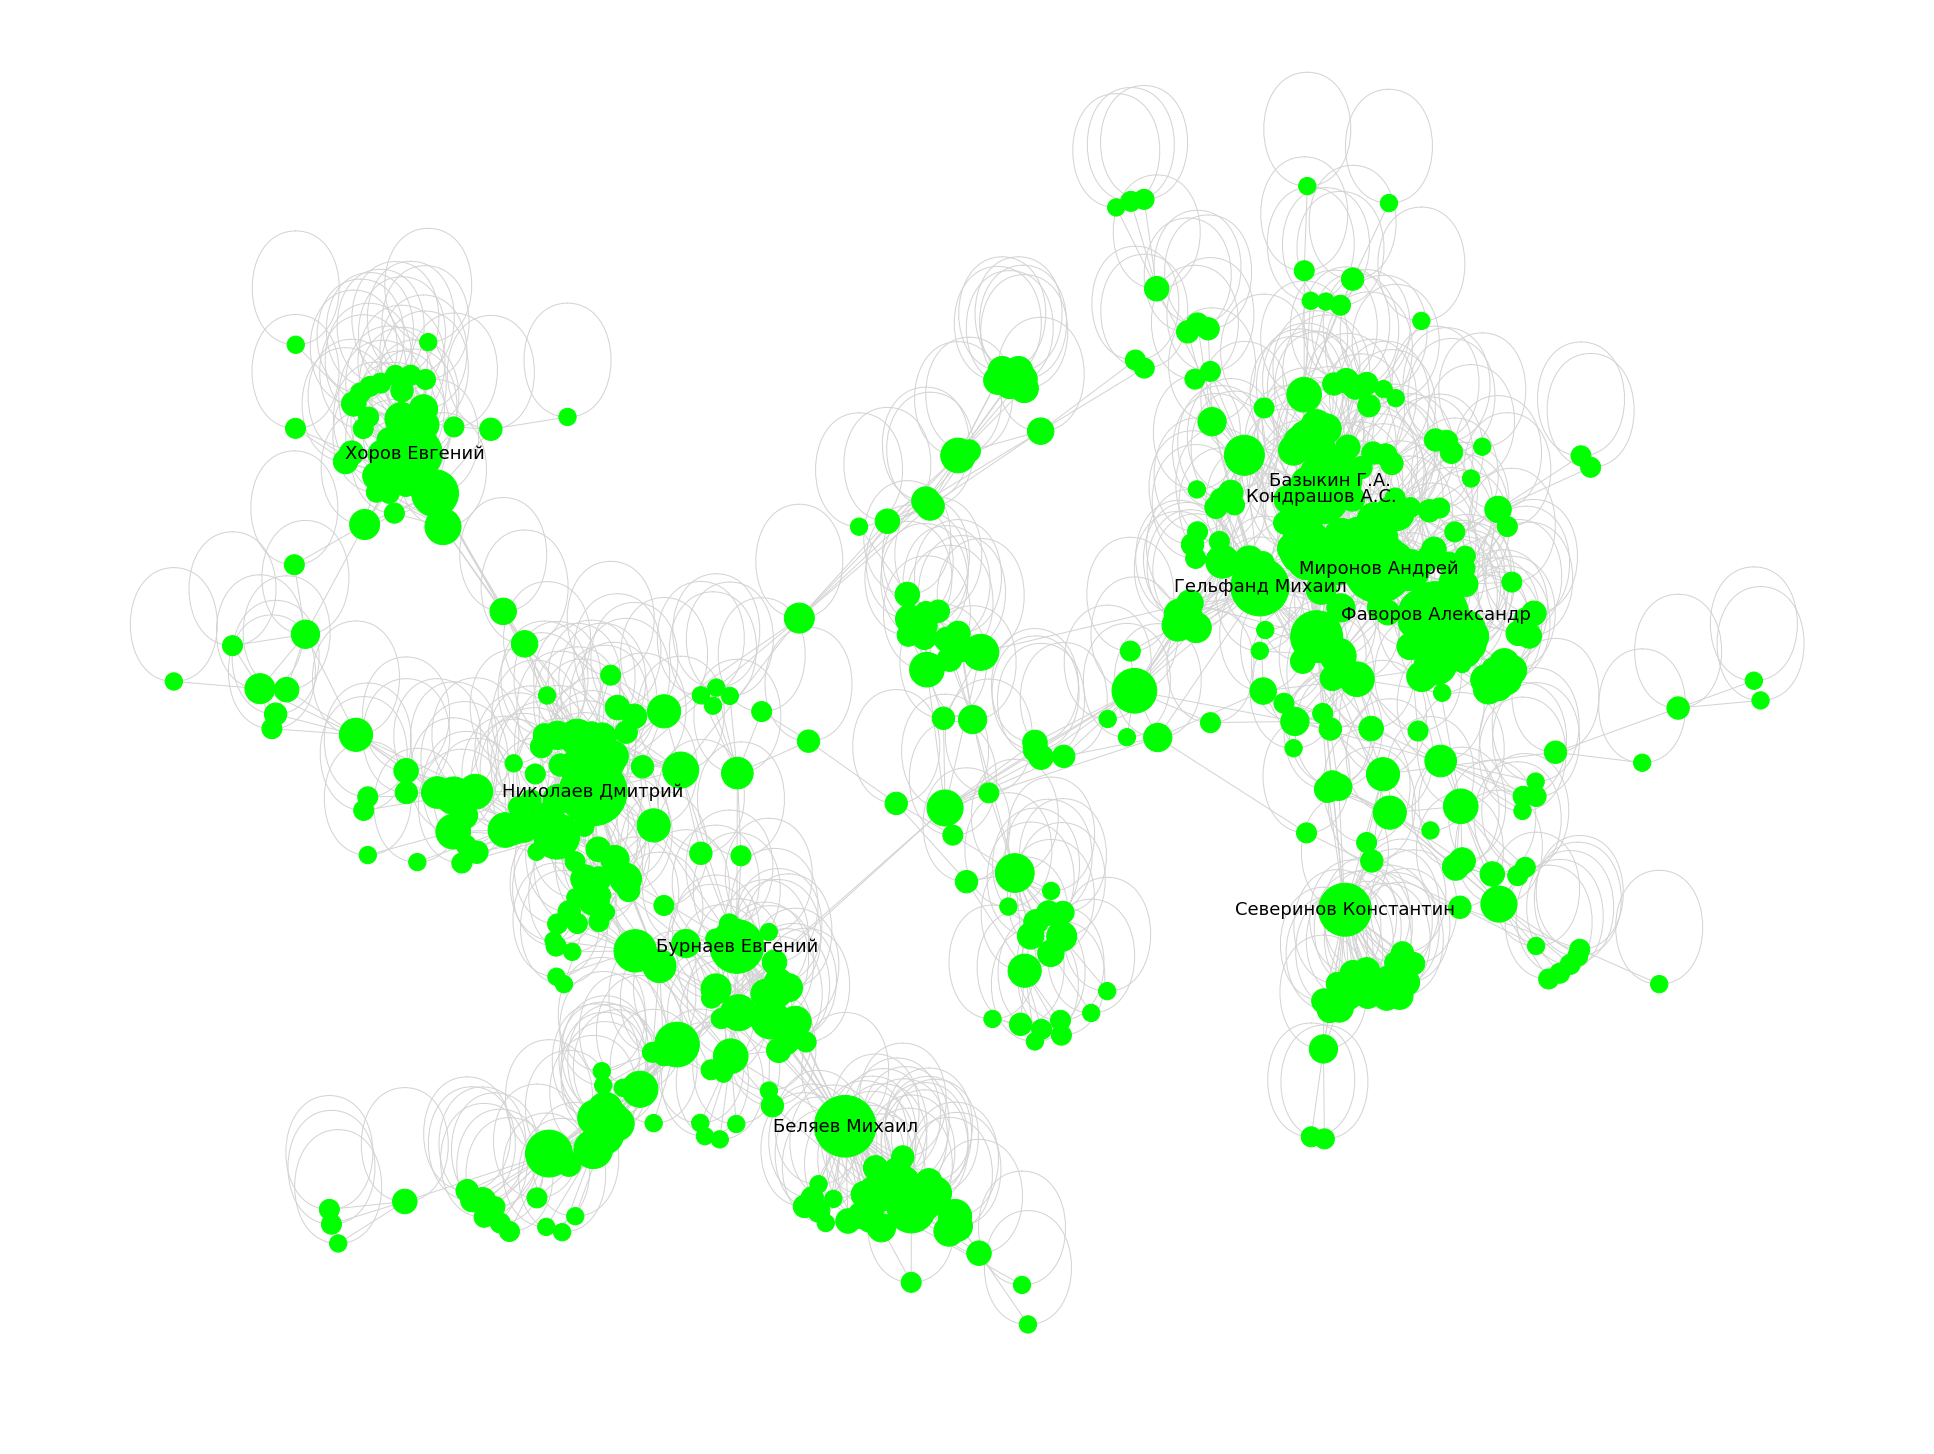

In [10]:
plt.figure(figsize=(26.666, 20))
nx.draw(G, 
        pos=nx.layout.fruchterman_reingold_layout(G, seed=7), 
        labels=dict(zip(biggest_nodes, biggest_authors)), 
        node_color='lime',
        node_size=np.fromiter(node_sizes.values(), dtype=int) * 100,
        edge_color='lightgray',
        font_size=18)

plt.savefig('iitas_network.png')